In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import pandas as pd

path = "datasets/antropometria-dataset.csv"

# Importar los datos
df = pd.read_csv(path)

df.head(10)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.700,2,146.40,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.650,2,145.10,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.800,1,162.00,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.400,2,146.50,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.950,2,161.00,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
5,241555,3,24,SAN LUIS POTOSI,1,10,7,31.900,1,141.45,...,20:12,1,20:19,1,M2435,5,3,1,588.463281,245
6,211879,2,21,PUEBLA,2,10,9,31.950,2,134.95,...,22:22,2,15:11,1,M2144,1,1,1,1879.750532,211
7,80135,3,8,CHIHUAHUA,2,11,9,32.400,1,136.60,...,18:32,3,18:32,1,M0804,7,1,1,589.164005,85
8,240207,4,24,SAN LUIS POTOSI,2,12,2,71.700,1,148.25,...,17:15,3,22:22,1,M2405,5,3,1,1122.094618,245
9,31220,3,3,BAJA CALIFORNIA SUR,1,10,10,48.025,1,147.05,...,17:09,2,17:09,1,M0331,5,3,1,138.063636,35


In [2]:
# Guardar los datos de las variables de interés
df.fillna(method ='ffill', inplace = True) 

In [3]:
df.tail(15)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
18625,10331,2,1,AGUASCALIENTES,2,83,5,54.50,1,147.00,...,4:00,1,4:00,1,M0109,5,3,1,1268.782403,15
18626,171455,1,17,MORELOS,1,71,1,77.35,2,171.30,...,8:20,1,8:30,1,M1732,2,1,2,627.566400,172
18627,300843,1,30,VERACRUZ DE IGNACIO DE LA LLAVE,1,79,3,68.60,1,150.20,...,15:40,3,16:15,1,M3020,5,3,1,6385.849606,305
18628,11169,1,1,AGUASCALIENTES,2,82,0,54.75,2,143.20,...,18:10,3,18:15,1,M0113,6,3,2,176.024757,16
18629,60499,2,6,COLIMA,2,39,10,71.45,2,145.55,...,18:00,3,18:00,1,M0613,2,1,2,155.158256,62
18630,210187,1,21,PUEBLA,1,84,8,57.05,2,156.20,...,21:00,3,21:05,1,M2105,3,2,1,1133.871396,213
18631,110105,1,11,GUANAJUATO,2,55,2,67.00,2,150.30,...,18:00,1,18:10,1,M1102,2,1,2,598.684990,112
18632,41941,2,4,CAMPECHE,2,87,8,39.55,1,136.15,...,7:30,1,8:00,1,R0418,3,2,1,390.851809,43
18633,160939,1,16,MICHOACAN DE OCAMPO,2,58,5,75.40,2,152.50,...,16:00,1,16:15,1,M1627,3,2,1,2297.639408,163
18634,10315,2,1,AGUASCALIENTES,1,29,0,118.85,2,168.80,...,18:13,1,18:28,1,M0109,5,3,1,1188.823820,15


In [4]:
sistol = df['sistol']
diastol = df['diastol']
peso = df['peso']
cintura = df['cintura']

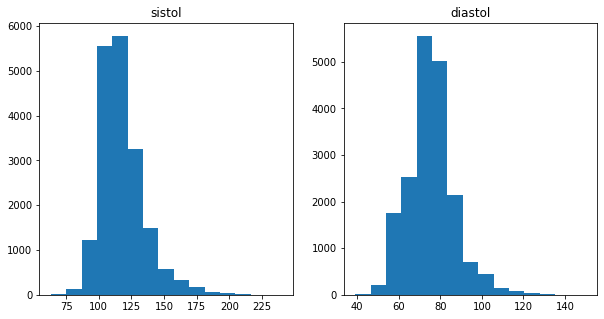

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x = sistol, bins = 15)
plt.title("sistol")

plt.subplot(1,2,2)
plt.hist(x = diastol, bins = 15)
plt.title("diastol")

plt.show()

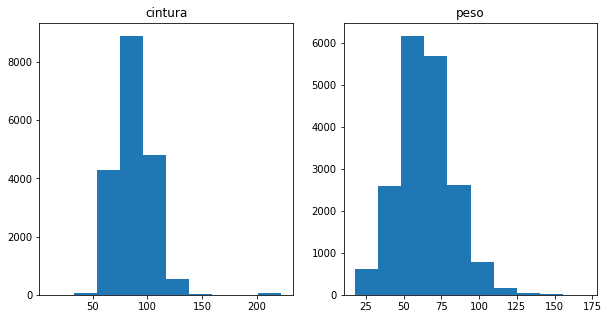

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x = cintura, bins = 10)
plt.title("cintura")

plt.subplot(1,2,2)
plt.hist(x = peso, bins = 10)
plt.title("peso")

plt.show()

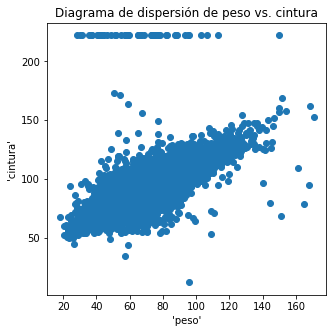

In [7]:
# Generar un diagrama de dispersión de peso vs. cintura
plt.figure(figsize=(5,5))
plt.scatter(x = peso, y = cintura)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("Diagrama de dispersión de peso vs. cintura")

plt.show()

In [8]:
#Separar datos de hombres y mujeres
hombres = df.loc[df['sexo']==1] 
mujeres = df.loc[df['sexo']==2]


In [9]:
sistol_hombres = hombres['sistol']
diastol_hombres = hombres['diastol']
peso_hombres = hombres['peso']
cintura_hombres = hombres['cintura']
sistol_mujeres = mujeres['sistol']
diastol_mujeres = mujeres['diastol']
peso_mujeres = mujeres['peso']
cintura_mujeres = mujeres['cintura']

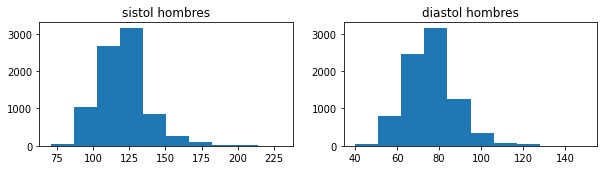

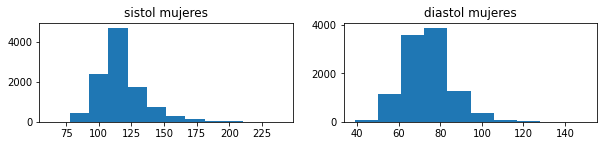

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.hist(x = sistol_hombres, bins = 10)
plt.title("sistol hombres")

plt.subplot(2,2,2)
plt.hist(x = diastol_hombres, bins = 10)
plt.title("diastol hombres")
plt.figure(figsize=(10,4))

plt.subplot(2,2,3)
plt.hist(x = sistol_mujeres, bins = 12)
plt.title("sistol mujeres")

plt.subplot(2,2,4)
plt.hist(x = diastol_mujeres, bins = 10)
plt.title("diastol mujeres")
plt.show()

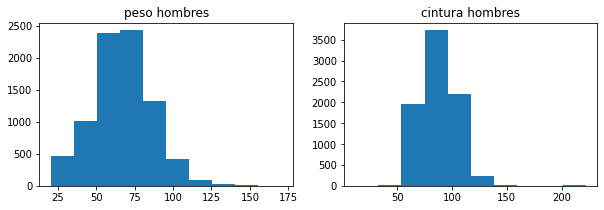

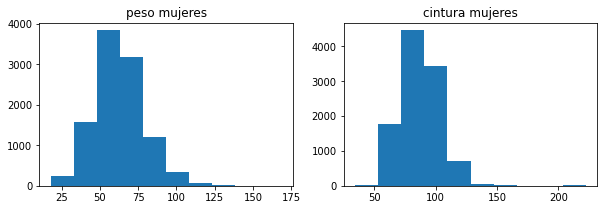

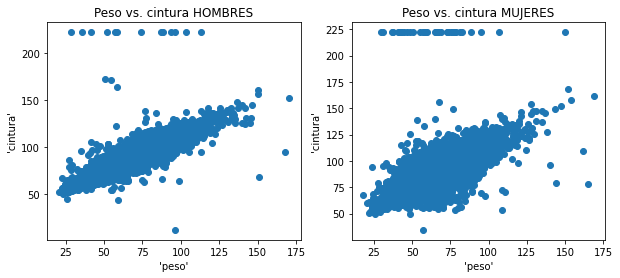

In [11]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.hist(x = peso_hombres, bins = 10)
plt.title("peso hombres")

plt.subplot(1,2,2)
plt.hist(x = cintura_hombres, bins = 10)
plt.title("cintura hombres")

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.hist(x = peso_mujeres, bins = 10)
plt.title("peso mujeres")

plt.subplot(1,2,2)
plt.hist(x = cintura_mujeres, bins = 10)
plt.title("cintura mujeres")
plt.show()


plt.figure(figsize=(10,4))
# Generar un diagrama de dispersión de peso vs. cintura
plt.subplot(1,2,1)
plt.scatter(x = peso_hombres, y = cintura_hombres)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("Peso vs. cintura HOMBRES")

# Generar un diagrama de dispersión de peso vs. cintura
plt.subplot(1,2,2)
plt.scatter(x = peso_mujeres, y = cintura_mujeres)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("Peso vs. cintura MUJERES")
plt.show()


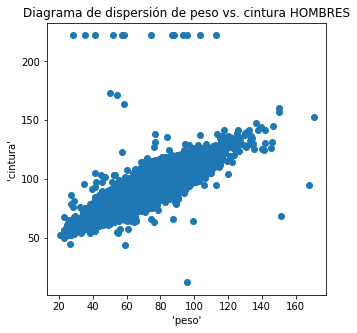

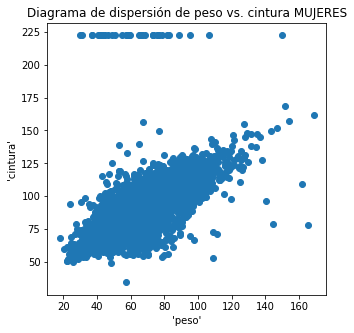

In [12]:
# Diagrama de dispersión de peso vs. cintura HOMBRES
plt.figure(figsize=(5,5))
plt.scatter(x = peso_hombres, y = cintura_hombres)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("Diagrama de dispersión de peso vs. cintura HOMBRES")
# Diagrama de dispersión de peso vs. cintura MUJERES
plt.figure(figsize=(5,5))
plt.scatter(x = peso_mujeres, y = cintura_mujeres)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("Diagrama de dispersión de peso vs. cintura MUJERES")

plt.show()

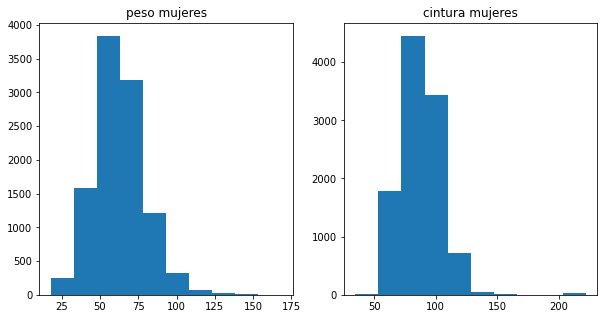

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x = peso_mujeres, bins = 10)
plt.title("peso mujeres")

plt.subplot(1,2,2)
plt.hist(x = cintura_mujeres, bins = 10)
plt.title("cintura mujeres")


plt.show()

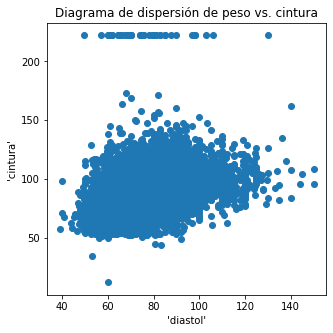

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x = diastol, y = cintura)
plt.xlabel("'diastol'")
plt.ylabel("'cintura'")
plt.title("Diagrama de dispersión de peso vs. cintura")

plt.show()

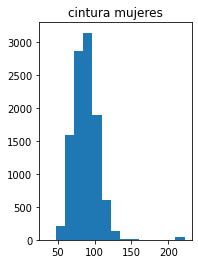

In [15]:
plt.subplot(1,2,2)
plt.hist(x = cintura_mujeres, bins = 15)
plt.title("cintura mujeres")
plt.show()